## Set Up

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

gdp_data = pd.read_csv('./GDP.csv')
gdp_data= gdp_data.fillna(method = "bfill")
gdp_capita_data = pd.read_csv('./GDP_capita.csv')
gdp_capita_data = gdp_capita_data.fillna(method = "bfill")
rsf_freedom_data = pd.read_csv('./rsf_data.csv')
rsf_freedom_data = rsf_freedom_data.fillna(method = "bfill")
complete = gdp_data.join(gdp_capita_data, lsuffix='_gdp_data', rsuffix='_gdp_capita_data')
names = rsf_freedom_data['EN_country'].tolist()

In [141]:
gdp_names = gdp_data['Country Name'].tolist()
filtered_list = []
for a in names:
    if a in gdp_names:
        filtered_list.append(a)
#complete[complete["Country Name_gdp_data"] == filtered_list]

final = pd.DataFrame()
for a in filtered_list:
    current = complete[complete["Country Name_gdp_data"] == a]
    frames = [final, current]
    final = pd.concat(frames)
final = final.reset_index()

In [142]:
rsf_freedom_data = rsf_freedom_data.drop(['Country Code_gdp_data', 'FR_Country', 'ES_country', 'EN_country', 'Zone'], axis = 1)
rsf_names = rsf_freedom_data.columns.tolist()
for a in rsf_names:
    final[a] = rsf_freedom_data[a]
final 

,index,Country Name_gdp_data,Country Code_gdp_data,Indicator Name_gdp_data,Indicator Code_gdp_data,1960_gdp_data,1961_gdp_data,1962_gdp_data,1963_gdp_data,1964_gdp_data,...,2015_gdp_capita_data,2016_gdp_capita_data,2017_gdp_capita_data,Rank2018,Underlying situation score 2016,Abuse score 2016,Overall Score 2016,Progression RANK,Rank 2017,Score 2017
0,1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,569.577923,561.778746,585.850064,118,"29,53","68,3","37,28",2,120,"39,46"
1,2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,3683.552607,3308.772828,4170.312280,121,"38,35",0,"38,35",4,125,"40,42"
2,3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,3952.830781,4131.872341,4537.862492,75,"29,49","16,1","29,49",1,76,"29,92"
3,4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,36038.267600,37231.815670,39146.548840,37,"22,21",0,"22,21",-2,35,"21,03"
4,6,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,...,39122.049710,38517.800390,40698.849340,128,"40,37","40,8","40,86",-9,119,"39,39"
5,7,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,...,13698.293440,12654.355000,14401.974850,52,"22,54","40,1","26,05",-2,50,"25,07"
6,8,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,...,3617.935746,3605.743117,3936.798320,80,"29,99",0,"29,99",-1,79,"30,38"
7,11,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,...,56561.412380,49896.681100,53799.938090,19,"15,46",0,"15,46",0,19,"16,02"
8,12,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,...,44206.784280,44731.010860,47290.911650,11,"14,04",0,"14,04",0,11,"13,47"
9,13,Azerbaijan,AZE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,...,5500.310382,3880.738731,4131.618310,163,"57,81","59,6","59,73",-1,162,"56,4"


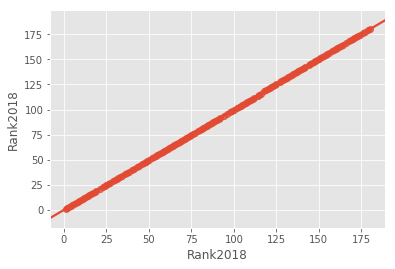

In [145]:
sns.regplot(x="Rank2018", y="Rank2018" , data=final)